In [2]:
# load libraries
library(tidyverse)
library(GGally)


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



In [7]:
data <-  read_csv("data/seat_tidy.csv")  %>% 
  # convert gender seating preference to factors 
  mutate(gender = as.factor(gender),
  seat_pref = as.factor(seat_pref)) 

Parsed with column specification:
cols(
  seat_pref = col_integer(),
  comp = col_double(),
  gender = col_integer(),
  engage = col_double()
)


In [9]:
head(data, 10)

seat_pref,comp,gender,engage
1,2.0,1,2.000000
2,3.5,2,2.333333
2,3.0,2,3.333333
2,4.0,1,3.666667
2,4.5,1,3.000000
4,1.0,2,3.000000
2,2.5,2,3.333333
2,2.5,2,3.333333
1,3.0,1,2.666667
2,3.0,1,2.666667


In [10]:
str(data)

Classes 'tbl_df', 'tbl' and 'data.frame':	64 obs. of  4 variables:
 $ seat_pref: Factor w/ 4 levels "1","2","3","4": 1 2 2 2 2 4 2 2 1 2 ...
 $ comp     : num  2 3.5 3 4 4.5 1 2.5 2.5 3 3 ...
 $ gender   : Factor w/ 3 levels "1","2","4": 1 2 2 1 1 2 2 2 1 1 ...
 $ engage   : num  2 2.33 3.33 3.67 3 ...


In [11]:
summary(data)

 seat_pref      comp       gender     engage     
 1:20      Min.   :1.000   1:34   Min.   :1.667  
 2:28      1st Qu.:2.000   2:25   1st Qu.:3.000  
 3:12      Median :3.000   4: 5   Median :3.667  
 4: 4      Mean   :3.047          Mean   :3.661  
           3rd Qu.:4.000          3rd Qu.:4.333  
           Max.   :5.000          Max.   :5.000  
                                  NA's   :1      

In [12]:
cor(x=data$comp, y=data$engage, use = "complete.obs")

[1] 0.1845122

In [13]:
head(data)

seat_pref,comp,gender,engage
1,2.0,1,2.000000
2,3.5,2,2.333333
2,3.0,2,3.333333
2,4.0,1,3.666667
2,4.5,1,3.000000
4,1.0,2,3.000000


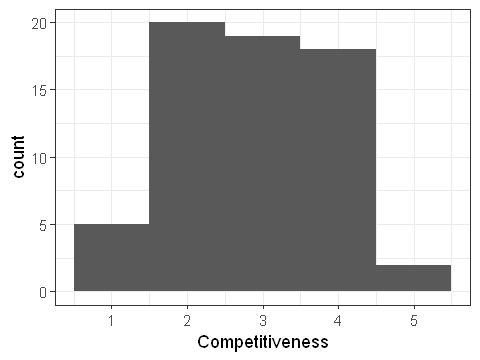

In [43]:
options(repr.plot.width=4, repr.plot.height=3)

# histograph of competitiveness
ggplot(data=data) +
  geom_histogram(aes(comp), bins = 5) + 
  theme_bw() +
  xlab("Competitiveness")

**Notes**

Distribution of competitiveness is approximately normally distributed with a mean of 3. There are less then 5 values for each extreme category. 



gender,n
1,34
2,25
4,5


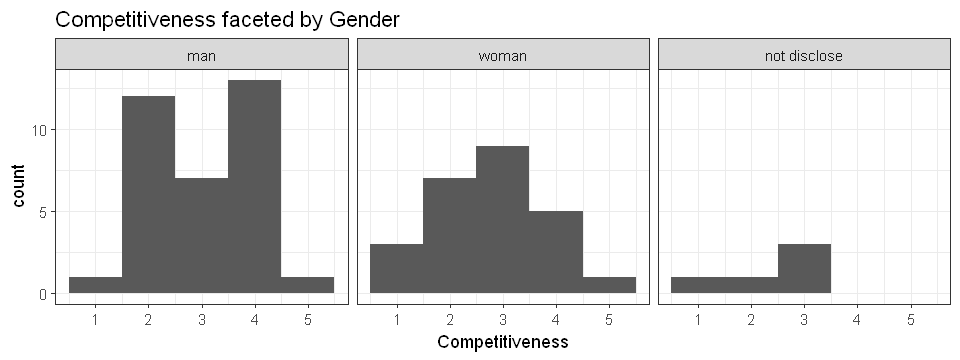

In [34]:
options(repr.plot.width=8, repr.plot.height=3)

# gender label names
label_gender <- c("1"="man" ,
                  "2"="woman",
                  "3"="other",
                  "4"="not disclose"
                    )
# histograph of competitiveness faceted by gender
ggplot(data=data) +
  geom_histogram(aes(comp), bins = 5) + 
  facet_wrap(~gender, labeller = labeller(gender = label_gender)) +
  theme_bw() +
  xlab("Competitiveness") +
  ggtitle("Competitiveness faceted by Gender")

data  %>% 
  group_by(gender)  %>%
  summarize(n =n())

**Notes**

The distribution for each gender has a different shape, while women have a unimodal distribution man has a bimodal distribution with a much low average competitiveness value. The sample size for prefer not to disclose is small and hard to make any claims for. The not disclose values may need to be dropped from the data set since gender is a potential confounding variable for our study.


seat_pref,n
1,20
2,28
3,12
4,4


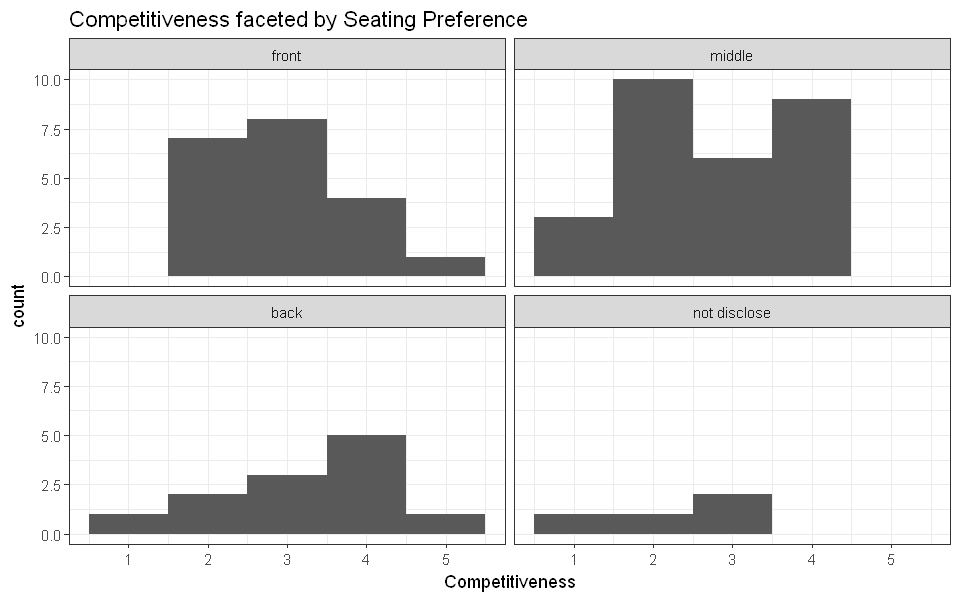

In [36]:
options(repr.plot.width=8, repr.plot.height=5)

# seating label names
label_seat <- c("1"="front" ,
                  "2"="middle",
                  "3"="back",
                  "4"="not disclose"
                    )
# histograph of competitiveness faceted by seating preference
ggplot(data=data) +
  geom_histogram(aes(comp), bins = 5) + 
  facet_wrap(~seat_pref, labeller = labeller(seat_pref = label_seat)) +
  theme_bw() +
  xlab("Competitiveness") +
  ggtitle("Competitiveness faceted by Seating Preference")

data  %>% 
  group_by(seat_pref)  %>%
  summarize(n =n())

# not used in code, used for reference of what groups mean
levels_competitiveness <- c("1"="Dislike a great deal" ,
                  "2"="Dislike somewhat",
                  "3"="Neither like nor dislike",
                  "4"="Like somewhat",
                  "5"="Like a great deal"
                    )

**Notes**

The most preferred seating location appears to be the middle while the back seems to be the least popular seating location. It is interesting that both the front and middle are both missing an extreme value. For people who prefer to sit in the front there is no one who highly not competitiveness and for people who prefer to side in the middle the is no one who is highly competitiveness. The sample for preference to disclose is very small.



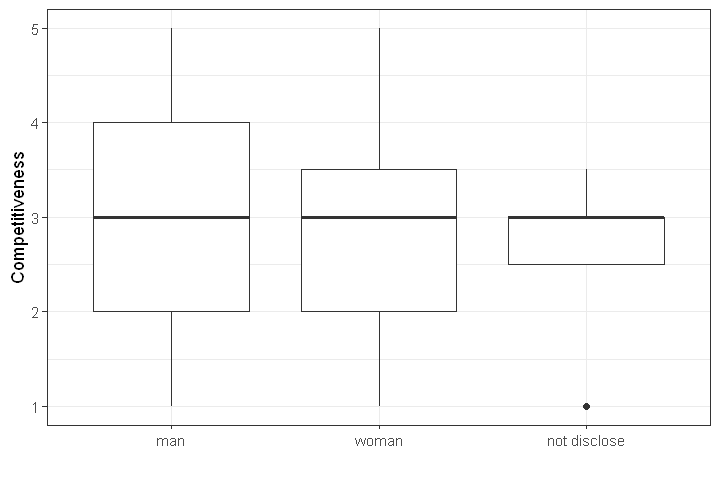

In [51]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(data=data) +
  geom_boxplot(aes(gender, comp)) + 
  ylab("Competitiveness") +
  xlab("") +
  theme_bw() +
  scale_x_discrete(breaks=c("1","2","4"),
        labels=c("1"="man" ,
                  "2"="woman",
                  "4"="not disclose"
                    ))


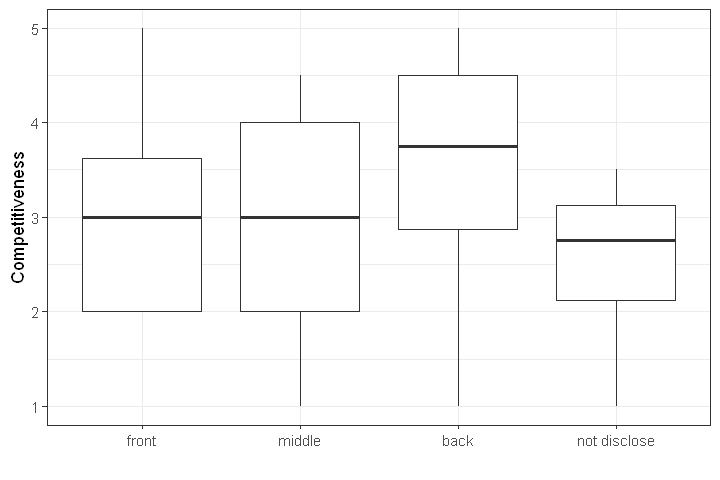

In [52]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(data=data) +
  geom_boxplot(aes(seat_pref, comp)) + 
  ylab("Competitiveness") +
  xlab("") +
  theme_bw() +
  scale_x_discrete(breaks=c("1","2","3", "4"),
        labels=label_seat)


Warning message:
"Removed 1 rows containing missing values (geom_point)."

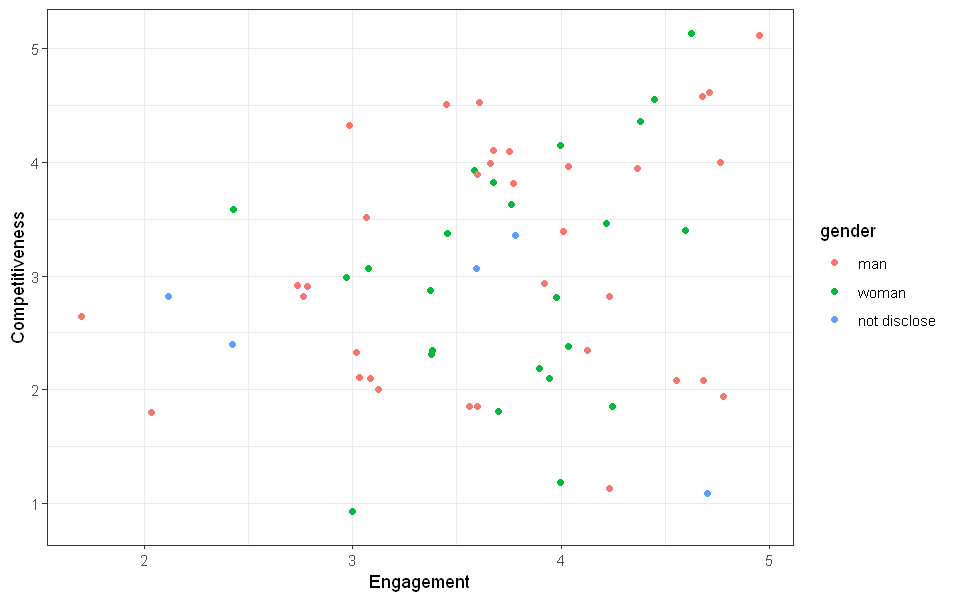

In [39]:
# Scatter plot of competitiveness vs engagement coloured by gender
ggplot(data=data) +
  geom_jitter(aes(engage, comp, color = gender)) + 
  theme_bw() +
  ylab("Competitiveness") +
  xlab("Engagement") +
  scale_color_discrete("gender", labels = label_gender)

**Notes**

The does not appear to be any clear groupings of gender with competitiveness and engagement. There are slightly more man points on the left indicating a lower engagement level then women. The majority of the data is in the middle ranges of both competitiveness and engagement.


Warning message:
"Removed 1 rows containing missing values (geom_point)."

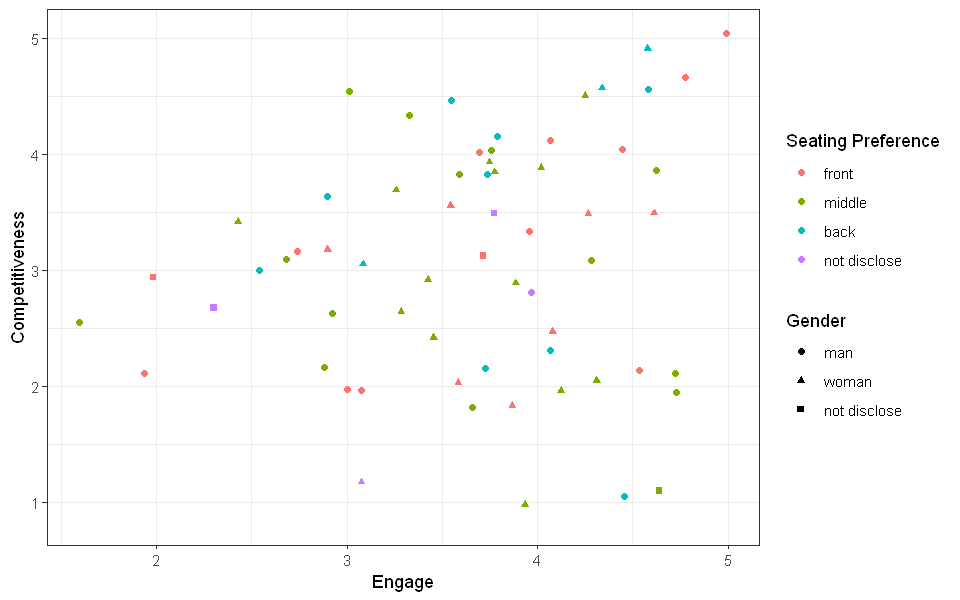

In [38]:
# Scatter plot of competitiveness vs engagement coloured by seating preference
ggplot(data=data) +
  geom_jitter(aes(engage, comp, color = seat_pref, shape=gender)) + 
  theme_bw() +
  ylab("Competitiveness") +
  xlab("Engage") +
  scale_color_discrete("Seating Preference", labels = label_seat) +
  scale_shape_discrete("Gender", labels = label_gender)

**Notes**

This plot shows all 4 variables. There does not appear to be any clear patterns between all the variables. 


Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
"Removing 1 row that contained a missing value"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing missing values (geom_point)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

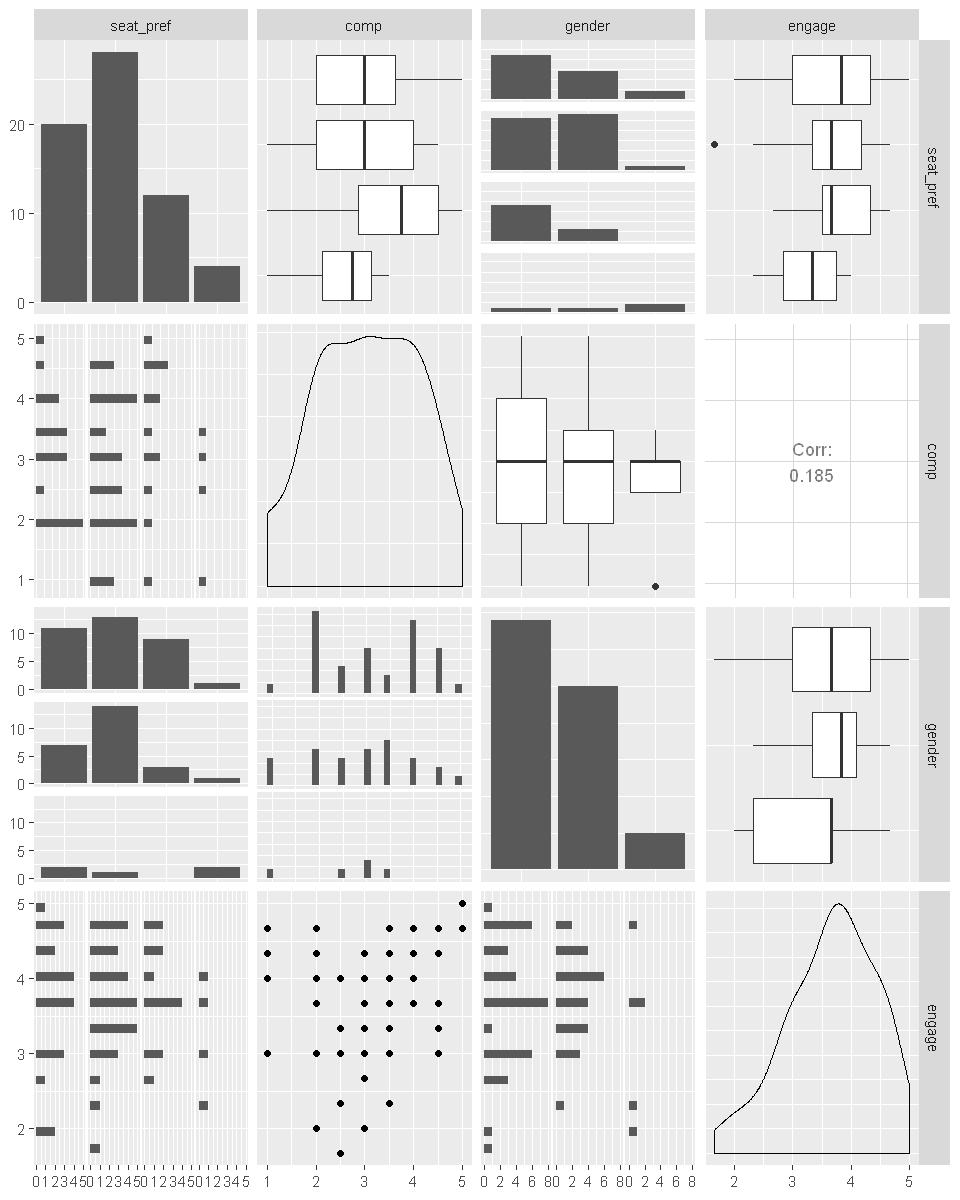

In [40]:
options(repr.plot.width=8, repr.plot.height=10)

# comparison across all variables 
ggpairs(data)